# Вступительное задание в ML секту

## Текст задания
Необходимо предсказать популярность песни на Spotify по её характеристикам c помощью датасета SpotifyFeatures.
Можно начать с модели линейной регрессии...

### Импорт и обработка данных

In [1]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

In [2]:
!gdown 1yKs0teWyaNzcJAXiGcajyInyymMQdzxB

Downloading...
From: https://drive.google.com/uc?id=1yKs0teWyaNzcJAXiGcajyInyymMQdzxB
To: /content/SpotifyFeatures.csv
100% 33.7M/33.7M [00:00<00:00, 159MB/s]


In [3]:
original_dataset = pd.read_csv("SpotifyFeatures.csv")

original_dataset.head(3)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.0,C#,0.346,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.0,F#,0.151,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.0,C,0.103,-13.879,Minor,0.0362,99.488,5/4,0.368


In [4]:
dataset = original_dataset.copy(deep=True)

#### Убираем ненужные параметры, бинарные приводим к численным

In [5]:
dataset.drop(columns=["artist_name", "track_name", "track_id"], inplace=True)
encoder = OrdinalEncoder(categories=[["Minor", "Major"]])
dataset[["mode"]] = encoder.fit_transform(dataset[["mode"]])

dataset.head(3)

,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,0,0.611,0.389,99373,0.910,0.0,C#,0.346,-1.828,1.0,0.0525,166.969,4/4,0.814
1,Movie,1,0.246,0.590,137373,0.737,0.0,F#,0.151,-5.559,0.0,0.0868,174.003,4/4,0.816
2,Movie,3,0.952,0.663,170267,0.131,0.0,C,0.103,-13.879,0.0,0.0362,99.488,5/4,0.368


#### Используем One Hot Encoding для небинарных строчных параметров

In [6]:
one_hot_encoding_columns = ["genre", "key", "time_signature"]
for column in one_hot_encoding_columns:
    encoded_column = pd.get_dummies(dataset[column])
    dataset = pd.concat([dataset, encoded_column], axis=1)
    dataset.drop(column, axis=1, inplace=True)

dataset.head(3)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,...,E,F,F#,G,G#,0/4,1/4,3/4,4/4,5/4
0,0,0.611,0.389,99373,0.910,0.0,0.346,-1.828,1.0,0.0525,...,0,0,0,0,0,0,0,0,1,0
1,1,0.246,0.590,137373,0.737,0.0,0.151,-5.559,0.0,0.0868,...,0,0,1,0,0,0,0,0,1,0
2,3,0.952,0.663,170267,0.131,0.0,0.103,-13.879,0.0,0.0362,...,0,0,0,0,0,0,0,0,0,1


#### Т.к. данные неоднородные, используем Standard Scaler

В данном случае выбросы не были найдены, так что противопоказаний для использования Scaler нет.

In [7]:
scaler_columns = dataset.columns.tolist()
scaler_columns.remove("popularity")

scaler = StandardScaler()
scaler.fit(dataset[scaler_columns])
scaled_columns = scaler.transform(dataset[scaler_columns])
dataset[scaler_columns] = scaled_columns

dataset.head(3)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,...,E,F,F#,G,G#,0/4,1/4,3/4,4/4,5/4
0,0,0.683376,-0.890935,-1.141368,1.286908,-0.489819,0.660661,1.290703,0.730526,-0.367970,...,-0.284179,-0.308958,-0.264547,-0.357629,-0.263961,-0.005863,-0.106458,-0.339966,0.399024,-0.151742
1,1,-0.345467,0.191994,-0.821867,0.630249,-0.489819,-0.322835,0.668683,-1.368876,-0.183082,...,-0.284179,-0.308958,3.780043,-0.357629,-0.263961,-0.005863,-0.106458,-0.339966,0.399024,-0.151742
2,3,1.644570,0.585296,-0.545298,-1.669954,-0.489819,-0.564927,-0.718402,-1.368876,-0.455832,...,-0.284179,-0.308958,-0.264547,-0.357629,-0.263961,-0.005863,-0.106458,-0.339966,-2.506116,6.590154


In [32]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

#### Реализуем функции для удобства

In [33]:
def evaluate_model(y_test: pd.Series,
                   y_pred: np.array) -> tuple[float, float, float, float]:

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    return mse, rmse, r2, mae


def create_confidence_interval_df(y_test: pd.Series,
                                  y_pred: np.array,
                                  alpha: int = 0.05) -> pd.DataFrame:

    n = len(y_pred)
    degrees_of_freedom = n - 1
    standard_error = np.std(y_pred, ddof=1) / np.sqrt(n)
    t_value = stats.t.ppf(1 - alpha / 2, degrees_of_freedom)
    interval = t_value * standard_error
    lower_bound = y_pred - interval
    upper_bound = y_pred + interval

    result_df = pd.DataFrame({
        "y_test": y_test,
        "lower_bound": lower_bound,
        "y_pred": y_pred,
        "upper_bound": upper_bound
    })

    return result_df


def plot_result_sample(result_df: pd.DataFrame,
                       sample_size: int = 100,
                       sample_seed: int = 42) -> None:

    result_sample = result_df.sample(sample_size, random_state=sample_seed).reset_index(drop=True)
    fig, ax = plt.subplots()

    ax.scatter(result_sample.index, result_sample.y_test, label="y_test", c="blue", s=30)
    ax.errorbar(result_sample.index, result_sample.y_pred,
                yerr=(result_sample["upper_bound"] - result_sample["lower_bound"]) / 2,
                color="orange",  ecolor="lightgreen", capsize=6,
                label="confidence_interval", fmt="o", elinewidth=3)


    ax.legend()
    plt.xlabel("Index")
    plt.ylabel("Popularity")
    plt.show()


def calculate_feature_importance(X_train: pd.DataFrame,
                                 one_hot_encoded_columns: list,
                                 original_dataset: pd.DataFrame,
                                 model) -> pd.DataFrame:

    feature_importance = pd.DataFrame({
        "feature": X_train.columns,
        "importance": np.abs(model.coef_)
    })

    for column in one_hot_encoded_columns:
        unique_encodings = original_dataset[column].unique()
        encodings_filter = feature_importance.feature.isin(unique_encodings)
        encodings_mean = feature_importance[encodings_filter].importance.mean()

        feature_importance = feature_importance[~encodings_filter]
        feature_importance = pd.concat([feature_importance, pd.DataFrame({
            "feature": column,
            "importance": encodings_mean}, index=[0])])

    return feature_importance.reset_index(drop=True).sort_values(by="importance", ascending=False)

#### Разделим данные на тренировочную и тестовую выборки

In [10]:
X = dataset.drop(columns=["popularity"])
y = dataset.popularity

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=42)

#### Рассмотрим наивную модель

Рассчитаем mean от целевой переменной, чтобы установить базовую линию для дальнейших предсказаний.

In [40]:
print(f"Mean value of popularity is {y.mean():.3f}")

Mean value of popularity is 41.128


### Модель Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression

#### Обучим модель

In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

#### Оценим точность

In [34]:
mse_lr, rmse_lr, r2_lr, mae_lr = evaluate_model(y_test, y_pred_lr)

print(f"MSE: {mse_lr:.3f}\nRMSE: {rmse_lr:.3f}\nR2: {r2_lr:.3f}\nMAE: {mae_lr:.3f}")

MSE: 92.717
RMSE: 9.629
R2: 0.720
MAE: 7.299


#### Рассмотрим результаты с учётом доверительного интервала

In [14]:
confidence_interval_lr = create_confidence_interval_df(y_test, y_pred_lr)

confidence_interval_lr.head(5)

,y_test,lower_bound,y_pred,upper_bound
788,45,45.433462,45.631365,45.829267
207109,25,34.322134,34.520037,34.717939
138644,19,35.500845,35.698748,35.896650
37164,29,39.198111,39.396013,39.593916
174351,17,20.877066,21.074968,21.272871


#### Построим график полученных результатов

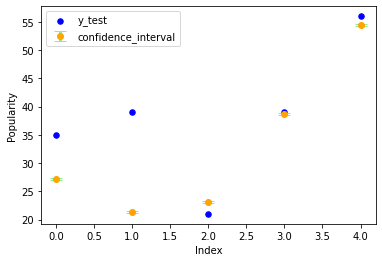

In [15]:
plot_result_sample(confidence_interval_lr, 5)

#### Оценим важность каждого признака

In [16]:
calculate_feature_importance(X_train, one_hot_encoding_columns, original_dataset, lr)

,feature,importance
12,key,3.758565e+12
11,genre,2.845988e+12
13,time_signature,2.211617e+12
6,loudness,1.015927e+00
8,speechiness,6.699770e-01
5,liveness,4.911363e-01
1,danceability,3.452714e-01
4,instrumentalness,3.257773e-01
10,valence,3.080239e-01
3,energy,3.050868e-01


#### Вывод по эксперименту
В итоге из самой простой модели без подбора гиперпараметров, мы получили довольно неплохую точность: R^2 = 0.72, MAE = 7.3. 
Но стоит обратить внимание на огромные коэффициенты перед признаками,
на которые был применён One Hot Encoding, что является следствием мультиколлинеарности. Попробуем исправить последнее
при помощи моделей линейной регрессии с встроенной регуляризацией - к примеру, Ridge.


### Модель RidgeCV

In [17]:
from sklearn.linear_model import RidgeCV

#### Обучим модель

In [18]:
rr = RidgeCV()
rr.fit(X_train, y_train)
y_pred_rr = rr.predict(X_test)

print("Best alpha value:", rr.alpha_)

Best alpha value: 10.0


#### Оценим точность

In [36]:
mse_rr, rmse_rr, r2_rr, mae_rr = evaluate_model(y_test, y_pred_rr)

print(f"MSE: {mse_rr:.3f}\nRMSE: {rmse_rr:.3f}\nR2: {r2_rr:.3f}\nMAE: {mae_rr:.3f}")

MSE: 92.717
RMSE: 9.629
R2: 0.720
MAE: 7.299


#### Рассмотрим результаты с учётом доверительного интервала

In [20]:
confidence_interval_rr = create_confidence_interval_df(y_test, y_pred_rr)

confidence_interval_rr.head(5)

,y_test,lower_bound,y_pred,upper_bound
788,45,45.430925,45.628785,45.826645
207109,25,34.338876,34.536735,34.734595
138644,19,35.505054,35.702914,35.900773
37164,29,39.193076,39.390936,39.588796
174351,17,20.863611,21.061470,21.259330


#### Построим график полученных результатов

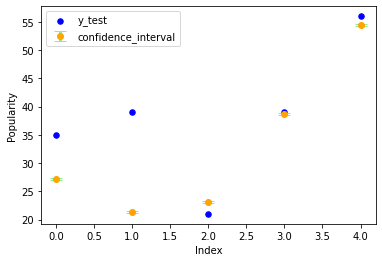

In [21]:
plot_result_sample(confidence_interval_rr, 5)

#### Оценим важность каждого признака

In [22]:
calculate_feature_importance(X_train, one_hot_encoding_columns, original_dataset, rr)

,feature,importance
11,genre,2.354536
6,loudness,1.014269
8,speechiness,0.672711
5,liveness,0.490938
1,danceability,0.343962
4,instrumentalness,0.328888
10,valence,0.309909
3,energy,0.306525
7,mode,0.153641
0,acousticness,0.094706


#### Вывод по эксперименту
Можно заметить, что коэффициенты пришли в норму, но, к сожалению, на точности предсказаний это не сказалось. Давайте попробуем использовать более комплексные модели, которые рассматривают нелинейную зависимость.

### Модель Polynomial Regression

In [23]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

#### Обучим модель

In [24]:
pipeline = Pipeline([
    ("pf", PolynomialFeatures(2)),
    ("regressor", Ridge(alpha=10))
])

pipeline.fit(X_train, y_train)
y_pred_pf = pipeline.predict(X_test)

#### Оценим точность

In [37]:
mse_pf, rmse_pf, r2_pf, mae_pf = evaluate_model(y_test, y_pred_pf)

print(f"MSE: {mse_pf:.3f}\nRMSE: {rmse_pf:.3f}\nR2: {r2_pf:.3f}\nMAE: {mae_pf:.3f}")

MSE: 89.369
RMSE: 9.454
R2: 0.730
MAE: 7.188


#### Рассмотрим результаты с учётом доверительного интервала

In [26]:
confidence_interval_pf = create_confidence_interval_df(y_test, y_pred_pf)

confidence_interval_pf.head(5)

,y_test,lower_bound,y_pred,upper_bound
788,45,45.557215,45.756874,45.956534
207109,25,32.043717,32.243376,32.443035
138644,19,36.109074,36.308733,36.508392
37164,29,38.619743,38.819402,39.019062
174351,17,23.182957,23.382616,23.582276


#### Построим график полученных результатов

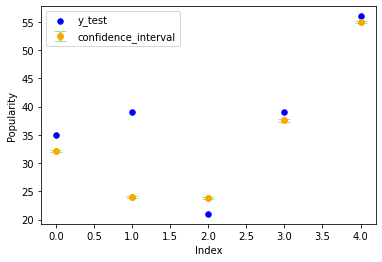

In [27]:
plot_result_sample(confidence_interval_pf, 5)

#### Оценим важность каждого признака 
(+ попарно, т.к. степень полинома 2)

In [28]:
pf_feature_importance = pd.DataFrame({
    "feature": pipeline.named_steps["pf"].get_feature_names_out(),
    "importance": np.abs(pipeline.named_steps["regressor"].coef_)
})

pf_feature_importance = pf_feature_importance[~(pf_feature_importance.feature == "1")]
pf_feature_importance.reset_index(drop=True).sort_values(by="importance", ascending=False)

,feature,importance
6,loudness,1.657197e+00
396,loudness Reggaeton,1.392501e+00
4,instrumentalness,1.098062e+00
283,instrumentalness Comedy,1.040084e+00
1160,Movie^2,9.686660e-01
...,...,...
1535,D# 0/4,3.328679e-06
644,A Capella 0/4,2.581615e-06
1485,B 0/4,2.211945e-06
1569,G 0/4,8.386496e-07


#### Выводы по эксперименту
Хоть и результаты полиномиальная регрессия стали немного лучше, по сравнению с линейными моделями, она не является оптимальной для нашего датасета, т.к. при использовании больших степеней, использование ресурсов этой моделью абсолютно неоптимально (с учётом 55 параметров и размере train ~200к объектов довольно очевидно почему).
Попробуем более продвинутые модели для достижения лучших предсказаний.

### Модель Random Forest

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

#### Обучим модель с подбором гиперпараметров

In [30]:
param_grid = {
    "n_estimators": [256],
    "max_depth": [32, 64],
    "min_samples_split": [8, 16],
    "min_samples_leaf": [1],
    "max_features": ["sqrt"]
}

rf = RandomForestRegressor()

grid_search_rf = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=6)
grid_search_rf.fit(X_train, y_train)
y_pred_rf = grid_search_rf.predict(X_test)

print(f"Best hyperparameters: {grid_search_rf.best_params_}")

/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best hyperparameters: {'max_depth': 64, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 256}


#### Оценим точность

In [42]:
mse_rf, rmse_rf, r2_rf, mae_rf = evaluate_model(y_test, y_pred_rf)

print(f"MSE: {mse_rf:.3f}\nRMSE: {rmse_rf:.3f}\nR2: {r2_rf:.3f}\nMAE: {mae_rf:.3f}")

MSE: 85.953
RMSE: 9.271
R2: 0.741
MAE: 7.064


#### Рассмотрим результаты с учётом доверительного интервала

In [43]:
confidence_interval_rf = create_confidence_interval_df(y_test, y_pred_rf)

confidence_interval_rf.head(5)

,y_test,lower_bound,y_pred,upper_bound
788,45,44.175235,44.371300,44.567365
207109,25,32.900695,33.096760,33.292825
138644,19,35.316874,35.512939,35.709004
37164,29,37.928433,38.124498,38.320563
174351,17,23.390117,23.586183,23.782248


#### Построим график полученных результатов

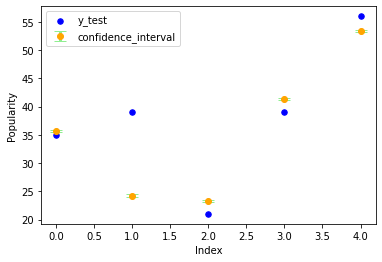

In [44]:
plot_result_sample(confidence_interval_rf, 5)

#### Выводы по эксперименту
Модель случайного леса показала качественно лучшие результаты, чем предыдущие модели. Стоит также понимать, что были подобраны не идеальные гиперпараметры, т.к. это заняло бы слишком большое количество времени и ресурсов. Но, проведя несколько экспериментов, вполне понятно, в какую сторону каждый из параметров можно улучшить. Рассмотрим модель из одного из основных фреймфорков для ML в Python - Keras и проведём сравнение.

### Модель MLP

In [45]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers

#### Разделим train выборку, отделив validation данные

In [46]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.9, random_state=42)

#### Составим модель и обучим её

In [47]:
model = Sequential()
model.add(Dense(1024, input_dim=55, activation="relu", kernel_regularizer=regularizers.l2(10 ** -3)))
model.add(Dropout(0.2))
model.add(Dense(256, activation="relu", kernel_regularizer=regularizers.l2(10 ** -3)))
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu", kernel_regularizer=regularizers.l2(10 ** -3)))
model.add(Dropout(0.2))
model.add(Dense(1, activation="linear"))

model.compile(optimizer="adam", loss="mean_squared_error")
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))
y_pred_mlp = model.predict(X_test)

Epoch 1/50
5891/5891 [==============================] - 62s 10ms/step - loss: 124.2388 - val_loss: 94.9562
Epoch 2/50
5891/5891 [==============================] - 61s 10ms/step - loss: 114.1041 - val_loss: 94.0448
Epoch 3/50
5891/5891 [==============================] - 61s 10ms/step - loss: 112.0887 - val_loss: 91.9800
Epoch 4/50
5891/5891 [==============================] - 61s 10ms/step - loss: 111.0049 - val_loss: 90.9038
Epoch 5/50
5891/5891 [==============================] - 61s 10ms/step - loss: 109.4558 - val_loss: 94.5573
Epoch 6/50
5891/5891 [==============================] - 59s 10ms/step - loss: 108.1180 - val_loss: 90.8058
Epoch 7/50
5891/5891 [==============================] - 61s 10ms/step - loss: 107.1308 - val_loss: 96.7519
Epoch 8/50
5891/5891 [==============================] - 60s 10ms/step - loss: 106.2082 - val_loss: 90.4207
Epoch 9/50
5891/5891 [==============================] - 58s 10ms/step - loss: 105.0972 - val_loss: 90.9155
Epoch 10/50
5891/5891 [==============

#### Графически оценим train и validation loss

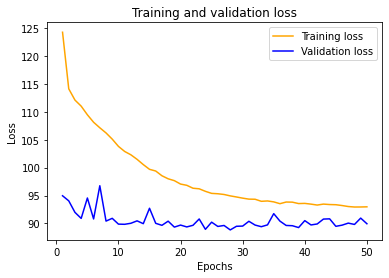

In [48]:
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = np.arange(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, "orange", label="Training loss")
plt.plot(epochs, val_loss, "blue", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### Оценим точность

In [49]:
mse_mlp, rmse_mlp, r2_mlp, mae_mlp = evaluate_model(y_test, y_pred_mlp)

print(f"MSE: {mse_mlp:.3f}\nRMSE: {rmse_mlp:.3f}\nR2: {r2_mlp:.3f}\nMAE: {mae_mlp:.3f}")

MSE: 88.617
RMSE: 9.414
R2: 0.733
MAE: 7.165


#### Рассмотрим результаты с учётом доверительного интервала

In [50]:
y_pred_mlp = list(y_pred_mlp.flat)
confidence_interval_mlp = create_confidence_interval_df(y_test, y_pred_mlp)

confidence_interval_mlp.head(5)

,y_test,lower_bound,y_pred,upper_bound
788,45,46.558384,46.761482,46.964581
207109,25,31.732239,31.935337,32.138435
138644,19,36.426426,36.629524,36.832623
37164,29,40.204723,40.407822,40.610920
174351,17,21.948702,22.151800,22.354898


#### Построим график полученных результатов

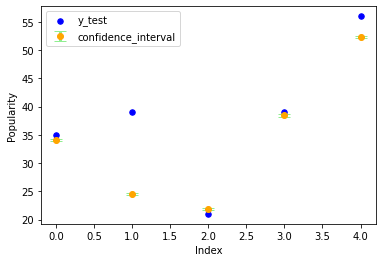

In [51]:
plot_result_sample(confidence_interval_mlp, 5)

#### Выводы по модели

### Результаты в единой таблице для наглядности

In [52]:
model_validation_df = pd.DataFrame({
    "model": ["linear", "ridge", "polynomial", "random forest", "multi-layer perceptron"],
    "mse": [mse_lr, mse_rr, mse_pf, mse_rf, mse_mlp],
    "rmse": [rmse_lr, rmse_rr, rmse_pf, rmse_rf, rmse_mlp],
    "r^2": [r2_lr, r2_rr, r2_pf, r2_rf, r2_mlp],
    "mae": [mae_lr, mae_rr, mae_pf, mae_rf, mae_mlp],
})

model_validation_df

,model,mse,rmse,r^2,mae
0,linear,92.716939,9.628964,0.720202,7.298955
1,ridge,92.717042,9.628969,0.720202,7.299121
2,polynomial,89.369489,9.453544,0.730304,7.187606
3,random forest,85.953429,9.271107,0.740613,7.063518
4,multi-layer perceptron,88.617280,9.413675,0.732574,7.165123


### Общий вывод
По сводному датасету метрик качества видно, что на первом месте идёт random forest, после него mlp, а далее polynomial. С учётом неоправданно большого количества ресурсов, необходимых для последнего (уже степень 3 требует больше ОЗУ, чем может выделить бесплатный google colab), можно считать победителями 2 последние модели. Учтём также и то, что у них есть задел на улучшение, заключающийся в подборе структуры модели и гиперпараметров. 

Результаты экспериментов в общем можно считать вполне приемлимыми, MSE=7 и R^2=0.74 для случайного леса - это, как мне кажется, вполне качественное решение задачи регрессии, которое могло быть использовано музыкантом для проверки актуальности своей работу для публики. Но нужно понимать, что результаты предсказаний порой не слишком точны, что является довольно логичным, т.к. на популярность песни могут влиять события, которые никак не отражены в датасете (актуальная тема, какие-либо вещи, связанные с артистом / группой).

Что можно улучшить?
+ Попробовать заменить One Hot Encoding, на, к примеру, Hashing Trick или другие аналоги. Я не уверен, что это даст качественный прирост, но небольшой вполне возможен.
+ С большими вычислительными ресурсами подобрать более удачные гиперпараметры для Random Forest. Не знаю, на каком этапе остановится сходимость MSE, но задел для прогресса там точно есть.
+ Попробовать поиграться со слоями, функциями активации и прочими параметрами MLP. Лично я провёл около 5 запусков с разными параметрами, и, уверен, что можно выбрать их релевантнее, что опять же требует времени и ресурсов.